<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Матвей! Меня зовут Михаил, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать крутым специалистом, а не только указать на совершенные тобой ошибки.

Видно, что к проекту приложен большой труд. Все ключевые этапы в работе выполнены, статистическое исследование проведено качественно. Так что в целом справиться с задачей тебе удалось.

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символами ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

# Анализ бизнес-показателей.

### Цель проекта.
Необходимо разобраться в причинах убытков развлекательного приложения Procrastinate Pro+ несмотря на огромные вложения в рекламу рассматирвая следующие задачи: 

 - Откуда приходят пользователи и какими устройствами они пользуются,
 - Сколько стоит привлечение пользователей из различных рекламных каналов;
 - Сколько денег приносит каждый клиент,
 - Когда расходы на привлечение клиента окупаются,
 - Какие факторы мешают привлечению клиентов.

Как итог, сформулировать рекомендации, которые помогут выйти компании в плюс. 



### Описание данных:

В вашем распоряжении три датасета с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года, выгрузка их покупок за этот период и данные о рекламных расходах.

 - Лог сервера с информацией о посещениях сайта `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
 
     - User Id — уникальный идентификатор пользователя,
     - Region — страна пользователя,
     - Device — тип устройства пользователя,
     - Channel — идентификатор источника перехода,
     - Session Start — дата и время начала сессии,
     - Session End — дата и время окончания сессии.


 - Информация о заказах (orders_info_short.csv) `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv)
 
     - User Id — уникальный идентификатор пользователя,
     - Event Dt — дата и время покупки,
     - Revenue — сумма заказа.


 - Информация о расходах на рекламу (costs_info_short.csv) `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv)

     - dt — дата проведения рекламной кампании,
     - Channel — идентификатор рекламного источника,
     - costs — расходы на эту кампанию.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


## Шаг 1. Загрузка данных и предобработка.

Импортируем необходимые для работы библиотеки, cчитываем CSV-файл и сохраняем его в датафрейм.

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import sqrt
from scipy.stats import binom, norm
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#visits = pd.read_csv(r'C:\Users\Matvey\Desktop\Курс\Проект__6\visits_info_short.csv', sep=',')
#orders = pd.read_csv(r'C:\Users\Matvey\Desktop\Курс\Проект__6\orders_info_short.csv', sep=',')
#costs = pd.read_csv(r'C:\Users\Matvey\Desktop\Курс\Проект__6\costs_info_short.csv', sep=',')

# Увеличим максимальное количество отображающихся столбцов.
pd.set_option('display.max_columns', None)

# Заранее приведем названия столбцов к ниженму регистру.
visits.columns = [col.lower().replace(' ','_') for col in visits.columns]
orders.columns = [col.lower().replace(' ','_') for col in orders.columns]
costs.columns = [col.lower().replace(' ','_') for col in costs.columns]

Рассмотрим информацию о имеющихся датафреймах.

In [3]:
display(visits.head(5), visits.info())
display(orders.head(5), orders.info())
display(costs.head(5), costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


None

В данных датасетах остутствуют пропуски, однако для следующих столбцов, есть некорректные типы данных, которые нужно будет исправить:

 - session_start 
 - session_end 
 - event_dt
 - dt
 
Также, необходимо будет проверить данные на наличие явных и неявных дубликатов.

Приведём столбцы session_start, session_end, event_dt, dt к корректному типу данных datetime.

In [4]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [5]:
display(visits.info(),orders.info(),costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

None

None

None

Проверим датафреймы на наличие явных дубликатов.

In [6]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Явные дубликаты в дубликаты в датасете отсутствуют, но необходимо проверить датафрейм и на наличие неявных дубликатов. Рассмотрим столбцы, в которых могут всречаться неявные дубликаты.

In [7]:
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())
display(costs['channel'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

После проведения предобработки, количество строк в датафрейме не изменилось.
В названиях столбцов названия столбцов к ниженму регистру, заглавные буквы заменены на строчные. Пропуски и дубликаты в датафремах отсутствуют, данные в столбцах с датами были преобразованы в формат datetime. Теперь можно приступать к анализу данных и ответам на вопросы проекта.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Очень хорошо, что не забываешь проверять данные на наличие пропусков и дубликатов.  Молодец, что приводишь даты к нужному формату - предобработка проведена отлично.

</div>

## Шаг 2.Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

**Зададим функции для вычисления значений метрик:**
 - get_profiles() — для создания профилей пользователей,
 - get_retention() — для подсчёта Retention Rate,
 - get_conversion() — для подсчёта конверсии,
 - get_ltv() — для подсчёта LTV.

### Функция для создания пользовательских профилей get_profiles()

In [8]:
def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start, channel, device, region
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    # признак payer принимает значение True, если идентификатор пользователя есть среди покупателей,
    # иначе payer принимает значение False.
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    # количество пользовтелей запишем в столбец unique_users
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index() # обновим индексы для dt и unique_users для дальнейшей работы
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # расчитываем САС 
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # заменяем значения NAN у органических пользоветелей на нули так как
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles # возвращаем профили с CAC

### Функция для расчета коэффицкнта удержания get_retention()

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Функция для расчета конверсии get_conversion()

In [10]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV и ROI

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Также, зададим функции для визуализации этих графиков:**
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

### Функция для сглаживания фрейма filter_data()

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция для визуализации удержания plot_retention()

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция для визуализации конверсии plot_conversion()

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция для визуализации LTV и ROI

In [15]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True,ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Шаг 3. Исследовательский анализ данных

**Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.**

In [16]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**Определим минимальную и максимальную даты привлечения пользователей привлечённых с 1 мая по 27 октября 2019 года.**

In [17]:
observation_date = datetime(2019, 11, 1).date()  # Момент анализа
horizon_days = 14 # Заданный горизонт анализа 

# Опция «игнорировать горизонт»
ignore_horizon = False

# Определим максимальную и минимальную дату привелечения пользователей 
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Минимальная дата привлечения пользователей:', profiles['dt'].max())
print('Последняя дата привлечения подходящих пользователей:', observation_date - timedelta(days=horizon_days))

Минимальная дата привлечения пользователей: 2019-05-01
Минимальная дата привлечения пользователей: 2019-10-27
Последняя дата привлечения подходящих пользователей: 2019-10-18


Итого, 27 октября - последняя дата привлечения пользователей. 31 октября - последнее наблюдение. 1 ноября - момент анализа. 18 октября - последняя дата привлечения пользователей, подходящих нам. Полученные даты соответствуют ТЗ.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Согласен👍 Все по ТЗ

</div>


### Анализ по стране

Определим из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого, построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

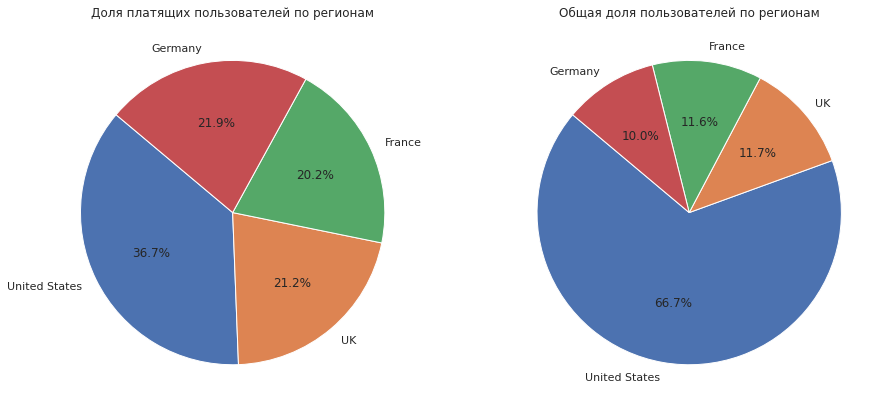

,total_users,paying_users,paying_percentage
region,,,
United States,100002,6902,6.9%
UK,17575,700,4.0%
France,17450,663,3.8%
Germany,14981,616,4.1%


In [18]:
# Группировка по странам и подсчет количества пользователей и платящих пользователей
country_stats = profiles.groupby('region').agg(
    total_users=('user_id', 'count'),
    paying_users=('payer', 'sum')
)

# Расчет доли платящих пользователей от общего числа пользователей
country_stats['paying_percentage'] = (country_stats['paying_users'] / country_stats['total_users']) * 100

# Сортировка в порядке убывания по количеству платящих пользователей
country_stats = country_stats.sort_values(by='paying_users', ascending=False)

# Создание двух круговых диаграмм для доли платящих пользователей и общей доли пользователей по регионам
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(15, 8))  
axs[0].pie(country_stats['paying_percentage'], labels=country_stats.index, autopct='%1.1f%%', startangle=140)  
axs[0].set_title('Доля платящих пользователей по регионам') 
axs[1].pie(country_stats['total_users'], labels=country_stats.index, autopct='%1.1f%%', startangle=140)  
axs[1].set_title('Общая доля пользователей по регионам')  
plt.show()

# Для удобства отобразим paying_percentage в виде процентов.
country_stats['paying_percentage'] = country_stats['paying_percentage'].apply(lambda x: '{:.1f}%'.format(x))

country_stats

**На основании построенной таблицы и диаграмм можем сделать выбор о том, United States является основным источником новых пользователей.**

 - Наибольшее количество приходящих пользователей приходится на United States (100002)
 
 - Наименьшее количество приходящих пользователей приходится на Germany (14981).

Относительно количества платящих пользователй схожие результаты

 - Наибольшее количество у United States (6902)
 
 - Наименьшее у Germany (616)
 
Доля платящих пользователей от общего числа пользователей

 - Наибольшее значение у United States - 6.9% 
 
 - Наименьшее у France - 3.8%.

### Анализ по устройству

Определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства. Также, для наглядности, построим диаграммы для доли платящих пользователей и общей доли пользователей по устройству.

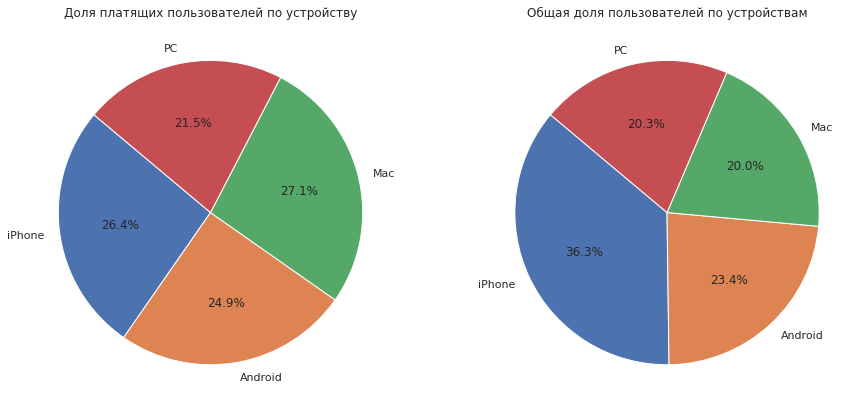

,total_users,paying_users,paying_percentage
device,,,
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
Mac,30042,1912,6.4%
PC,30455,1537,5.0%


In [19]:
# Группировка по устройствам и подсчет количества пользователей и платящих пользователей
device_stats = profiles.groupby('device').agg(
    total_users=('user_id', 'count'),
    paying_users=('payer', 'sum')
)

# Расчет доли платящих пользователей от общего числа пользователей
device_stats['paying_percentage'] = (device_stats['paying_users'] / device_stats['total_users']) * 100


# Сортировка в порядке убывания по количеству платящих пользователей
device_stats = device_stats.sort_values(by='paying_users', ascending=False)

# Создание двух круговых диаграмм для доли платящих пользователей и общей доли пользователей по типу устройства
fig, axs = plt.subplots(1, 2, figsize=(15, 8)) 
axs[0].pie(device_stats['paying_percentage'], labels=device_stats.index, autopct='%1.1f%%', startangle=140) 
axs[0].set_title('Доля платящих пользователей по устройству')  
axs[1].pie(device_stats['total_users'], labels=device_stats.index, autopct='%1.1f%%', startangle=140)  
axs[1].set_title('Общая доля пользователей по устройствам')  
plt.show()

# Для удобства отобразим paying_percentage в виде процентов.
device_stats['paying_percentage'] = device_stats['paying_percentage'].apply(lambda x: '{:.1f}%'.format(x))
device_stats


**На основании построенной таблицы и диаграмм можем сделать выбор о том, пользователи мобильных устройств доминируют.**

- Наибольшее количество приходящих пользователей приходится на iPhone (54479)

- Наименьшее количество приходящих пользователей приходится на Mac (30042).

Относительно количества платящих пользователй результаты отличаются, 
 - Наибольшее количество у iPhone (3382),
 - Наибольшее количество у PC (1537).
 
Доля платящих пользователей от общего числа пользователей

 - Наибольшее значение у Mac - 6.4% 
 - Наименьшее у PC	 - 5.0%.

### Анализ по каналу привлечения

Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. Также, для наглядности, построим диаграммы для доли платящих пользователей и общей доли пользователей по источнику привлечения.

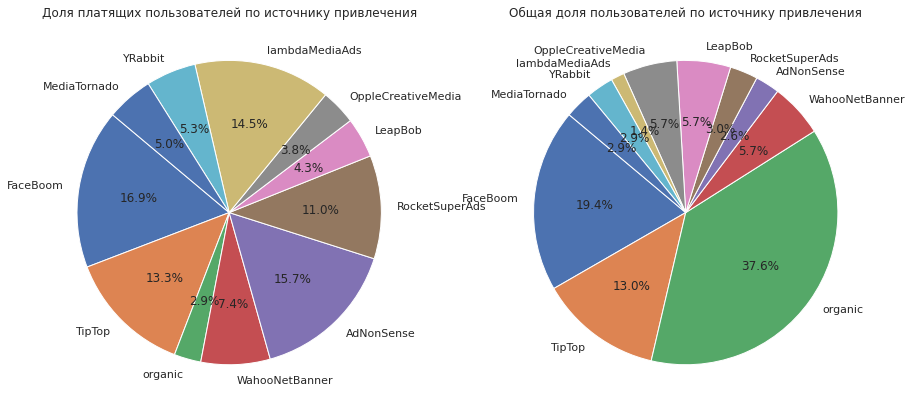

,total_users,paying_users,paying_percentage
channel,,,
FaceBoom,29144,3557,12.2%
TipTop,19561,1878,9.6%
organic,56439,1160,2.1%
WahooNetBanner,8553,453,5.3%
AdNonSense,3880,440,11.3%
RocketSuperAds,4448,352,7.9%
LeapBob,8553,262,3.1%
OppleCreativeMedia,8605,233,2.7%
lambdaMediaAds,2149,225,10.5%


In [20]:
# Группировка по источнику привлечения и подсчет количества пользователей и платящих пользователей
channel_stats = profiles.groupby('channel').agg(
    total_users=('user_id', 'count'),
    paying_users=('payer', 'sum')
)

# Расчет доли платящих пользователей от общего числа пользователей
channel_stats['paying_percentage'] = (channel_stats['paying_users'] / channel_stats['total_users']) * 100


# Сортировка в порядке убывания по количеству платящих пользователей
channel_stats = channel_stats.sort_values(by='paying_users', ascending=False)

# Создание двух круговых диаграмм для доли платящих пользователей и общей доли пользователей по источнику привлечения
fig, axs = plt.subplots(1, 2, figsize=(15, 8)) 
axs[0].pie(channel_stats['paying_percentage'], labels=channel_stats.index, autopct='%1.1f%%', startangle=140) 
axs[0].set_title('Доля платящих пользователей по источнику привлечения')  
axs[1].pie(channel_stats['total_users'], labels=channel_stats.index, autopct='%1.1f%%', startangle=140)  
axs[1].set_title('Общая доля пользователей по источнику привлечения')  
plt.show()

# Для удобства отобразим paying_percentage в виде процентов.
channel_stats['paying_percentage'] = channel_stats['paying_percentage'].apply(lambda x: '{:.1f}%'.format(x))
channel_stats


На основании построенной таблицы и диаграмм можем сделать выбор о том, что большинство пользователей приходит органическим путем, платные каналы могут быть эффективнее а прилечении платящих пользователей, даже если общее количество пользователей у них ниже.

- Наибольшее количество пользователей приходит из источника organic (56439)
- Наименьшее количество пользователей приходит из источника lambdaMediaAds (2149).

Относительно количества платящих пользователй результаты отличаются,

- Наибольшее наибольшее количество у FaceBoom (3557), 
- Наименьшее у MediaTornado (156).

Доля платящих пользователей от общего числа пользователей

 - Наибольшее значение у FaceBoom - 12.2% 
 - Наименьшее у organiс - 2.1%.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   





   Доли платящих пользователей рассчитаны верно. Здорово, что ты используешь метод форматирования строк `format()`, который позволяет представить долю в процентах более наглядно.

</div>

## Шаг 4. Маркетинг

В рамках анализа маркетинга выполним следующие пункты:

- Расчитаем общую сумму расходов на маркетинг.

- Определим, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.

- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.


In [21]:
print('Общая сумма расходов на маркетинг составляет:', costs.costs.sum().round())

Общая сумма расходов на маркетинг составляет: 105497.0


**Определим, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник. Построим сводную таблицу с тратами и их отображение в процентах.**

In [22]:
costs_stats = costs.pivot_table(index='channel', values='costs', aggfunc='sum')\
                               .sort_values(by='costs', ascending=False)

costs_stats['paying_percentage'] = (costs_stats['costs'] / costs_stats['costs']\
                                    .sum()) * 100

# Для удобства отобразим paying_percentage в виде процентов.
costs_stats = costs_stats.style.format({'costs': '{:.1f}', 'paying_percentage': '{:.1f}%'})
costs_stats

,costs,paying_percentage
channel,,
TipTop,54751.3,51.9%
FaceBoom,32445.6,30.8%
WahooNetBanner,5151.0,4.9%
AdNonSense,3911.2,3.7%
OppleCreativeMedia,2151.2,2.0%
RocketSuperAds,1833.0,1.7%
LeapBob,1797.6,1.7%
lambdaMediaAds,1557.6,1.5%
MediaTornado,954.5,0.9%


Можем сделать вывод о том, что большая часть затрат приходится на рекламные источники TipTop (54751.3) и FaceBoom (32445.6). Они являются безусловными лидерами в привлечении пользователей.

**Отобразим динамику изменения расходов во времени по неделям по каждому источнику.**

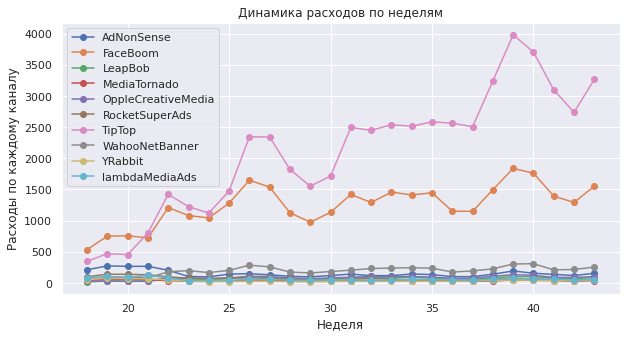

,dt,channel,costs,week
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18


In [23]:
# Преобразуем столбец с датой в формат datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Извлекаем номер недели из даты
costs['week'] = costs['dt'].dt.isocalendar().week

# Создаем сводную таблицу для динамики расходов по неделям и источникам
costs_pivot_weekly = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')

# Строим график динамики расходов по неделям для каждого источника
costs_pivot_weekly.plot(grid=True, figsize=(10, 5), marker='o')
plt.title('Динамика расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы по каждому каналу')
plt.legend(loc='upper left') # меняем расположением легенды
plt.show()
display(costs.head())

**Отобразим динамику изменения расходов во времени по месяцам по каждому источнику.**

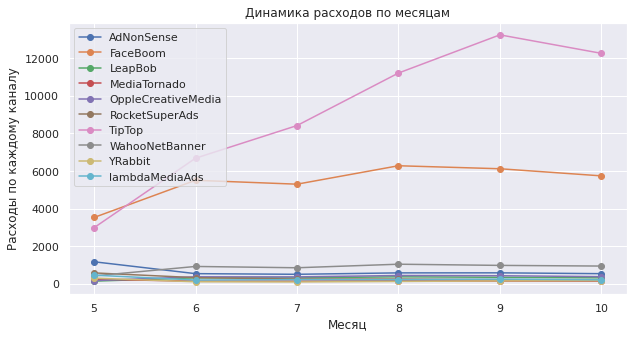

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [24]:
# Извлекаем номер месяца
costs['month'] = pd.to_datetime(costs['dt']).dt.month

# Создаем сводную таблицу для динамики расходов по месяцам и источникам
costs_month = costs.pivot_table(index='month', values='costs', columns='channel', aggfunc='sum')

# Строим график динамики расходов по месяцам для каждого источника
costs_month.plot(grid=True, figsize=(10, 5), marker='o') 
plt.title('Динамика расходов по месяцам') 
plt.xlabel('Месяц')  
plt.ylabel('Расходы по каждому каналу')  
plt.legend(loc='upper left') # меняем расположением легенды
plt.show()
display(costs.head())

На основании построенных таблиц и графиков можем сделать выбор о том, что по небелям и месяцам большая часть затрат на привлечение пользователей стабильно приходится на рекламные источники TipTop и FaceBoom. 

При рассмотрении динамики наблюдается рост затрат до октября включительно, затем незначительно снижение.

 - Пик раскодов на TipTop - примерно 13000 в сентябре.
 - Пик раскодов на FaceBoom - примерно 6000 в августе.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   


   
   Рекомендую также ознакомиться с типом графика "с накоплением" - его можно сделать, например, с помощью plot.area

</div>

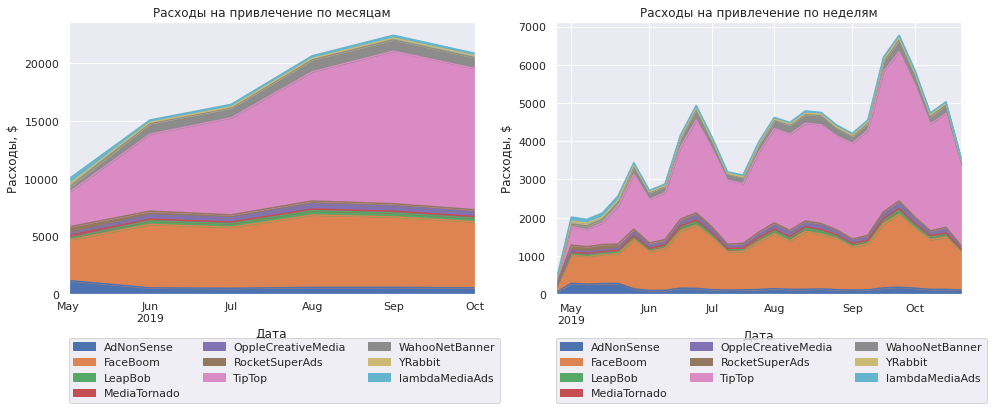

In [25]:


# Код ревьюера
costs['Расходы на привлечение по месяцам'] = costs['dt'].astype('datetime64[M]')
costs['Расходы на привлечение по неделям'] = costs['dt'].astype('datetime64[W]')

columns = ['Расходы на привлечение по месяцам', 'Расходы на привлечение по неделям']

plt.subplots(figsize = (16, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', 
                      aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, $')
    plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо за совет, учту в будущих проектах.
</div>

**На осоновнании профилей пользователей определим, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.**

In [26]:
# Определяем среднее значение САС по типам источников.
cac_stats = profiles.groupby('channel') \
        .agg ({'acquisition_cost': 'mean'}) \
        .sort_values('acquisition_cost', ascending = False)

round(cac_stats, 2)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Можем сделать вывод о том, что наибольшее значение привлечения одного пользователя (САС) соответствует каналу привлечения TipTop (2.80). Данные результаты ожидаемы, так как на канал привлечения TipTop приходится 51.9% всего рекламного бюджета, этим и объясняется такая результативность. 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, далее по ходу анализа стоит обратить особое внимание на каналы TipTop и FaceBoom

</div>


## Шаг 5. Оценка окупаемости рекламы

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В данном пункте по заданию необходимо писать промежуточные выводы, все они будут написаны под соответствующей частью. 
Причины неэффективности привлечения пользователей и низкой окупаемости будут описаны в общем выводе. Все рекомендации будут там же.    
</div>

Используя имеющиеся функции, проанализируем окупаемость рекламы. 

Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

 - Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

 - Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. 

**Горизонт и момент анализа были заданы заранее.**

**В данном случае не будем включть в анализ органических пользователей, так как они не входят в бюджет рекламной компании и никак не влияют на окупаемость рекламы.**

In [27]:
profiles = profiles.query('channel != "organic"').reset_index(drop = True)

**Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().**

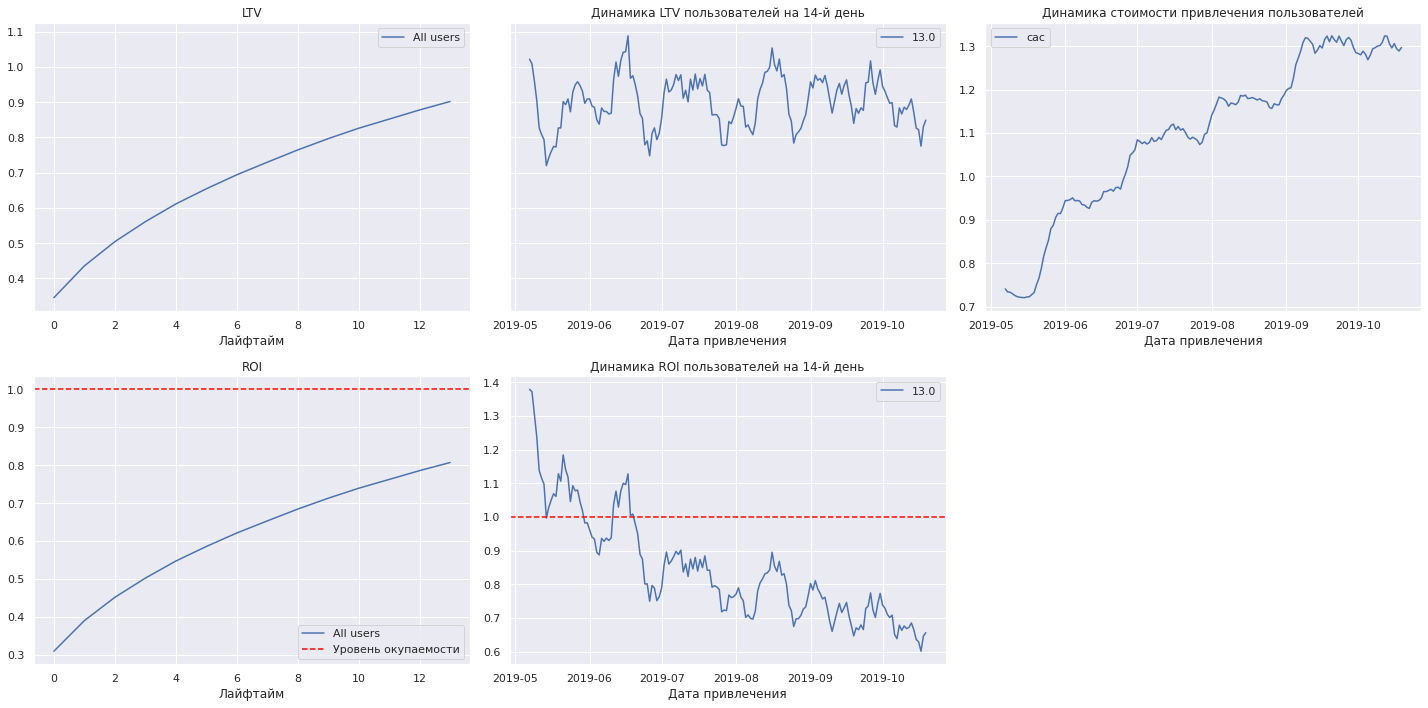

In [28]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   ROI падает, так как растет привлечение

</div>


**Построим график конверсии пользователей Conversion Rate используюя функции get_conversion() и plot_conversion()**

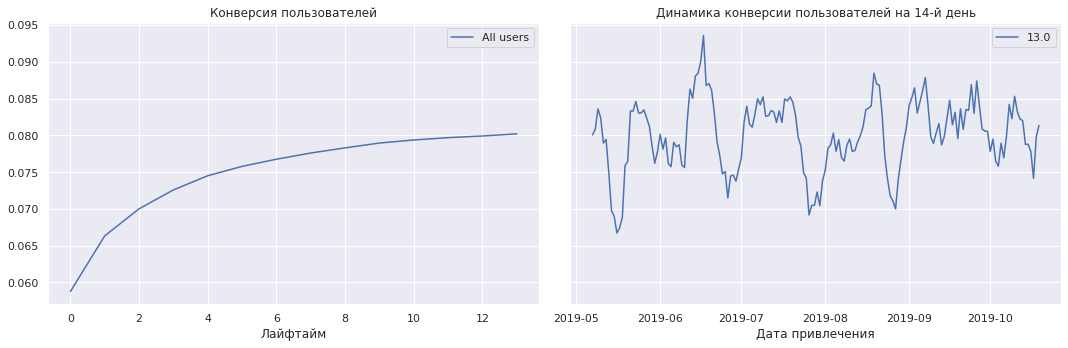

In [29]:
# смотрим конверсию
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion, conversion_history, horizon_days) 

**Построим график удержания пользователей Retention Rate используя функции get_retention() и plot_retention()**

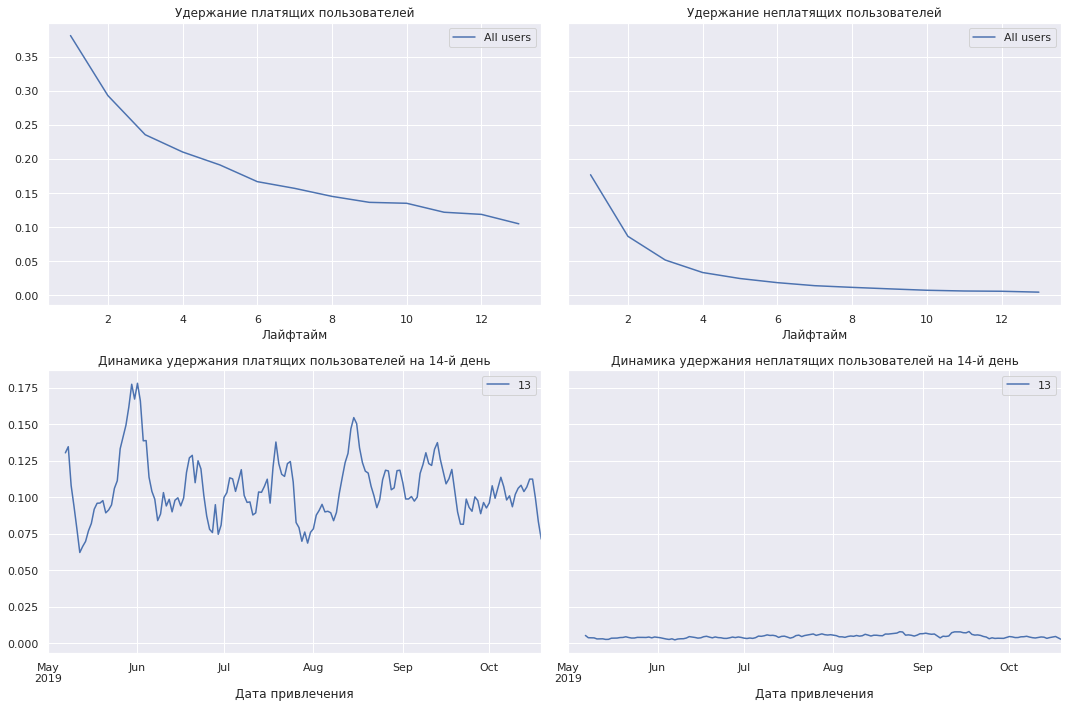

In [30]:
# смотрим удержание 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)


**На основании построенных графиков можем сделать выбор о том, что:**

 - Значение LTV, т.е сумма денег, которую один клиент в среднем приносит компании со всех своих покупок стабильно растет.
 
 
 - В динамике рост LTV скачкообразный, на это может влиять сезонный фактор.
 
 
 - Динамика стоимости привлечения пользователей помесячно растет,  рекламный бюджет увеличивается.
 

 - Падение окупаемости рекламы наблюдается в июне.
 
 
 - Значение ROI в конце второй недели — чуть выше 80%. Его динамика за лайвтайм падает. Следовательно, привлеченные клиенты перестают окупаться в двухнедельном лайфтайме.
 
 
 - Отмечается нормальный рост конверсии пользователей.
 
 
 - Отмечается более высокий уровень удержания у платящих пользователей. На 14 день для платящих пользователей наблюдается достаточно большой расброс удержания в динамике, в отличии неплатящих пользователей.


Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

**Проанализируем окупаемость рекламы с разбивкой по устройствам.**

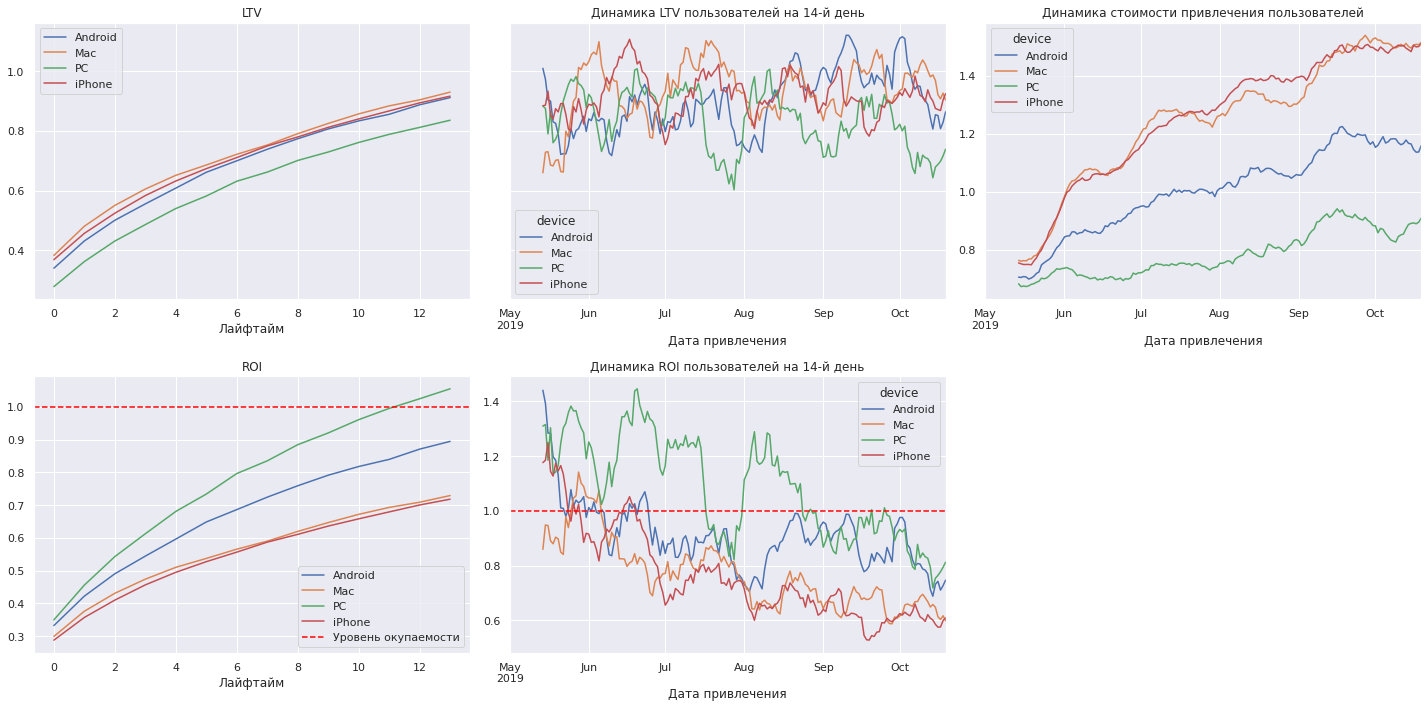

In [31]:
# Используем функции get_ltv() и plot_ltv_roi().
# Задаем разбивку по устройству.
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На основании построенных графиков можем сделать выбор о том, что:

 - Затраты на рекламу всех устройств, корме PC не окупаются.
 
 
 - PC начинает окупаться только на 12 день лайвтайма.
 
 
 - Отмечается стабильный рост стоимости привлечения пользователей с типом устройства iPhone и Mac.
 
 
 - Рост LTV в динамике скачкообразный, на это может влиять сезонный фактор.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   При этом стоит помнить, что основная масса пользователей США использует технику аррle

</div>


**Проанализируем окупаемость рекламы с разбивкой по странам.**

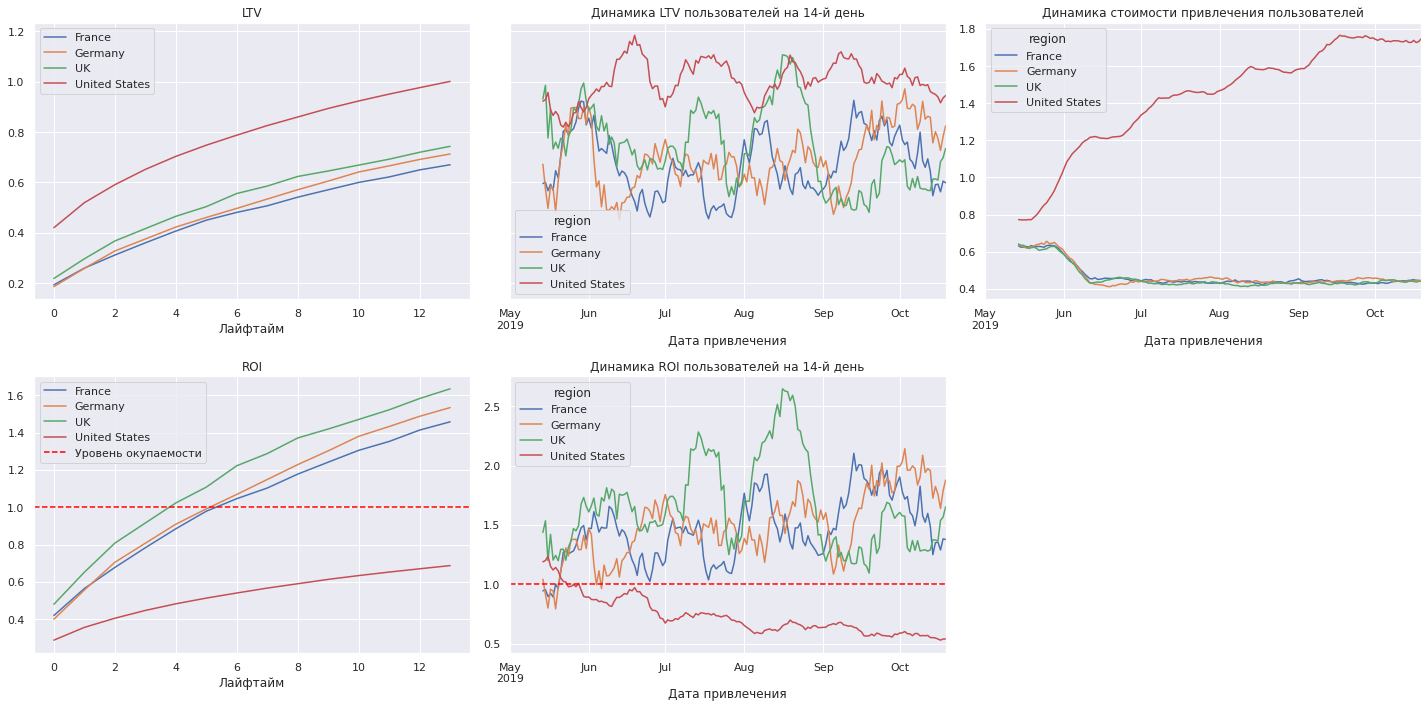

In [32]:
# Используем функции get_ltv() и plot_ltv_roi().
# Задаем разбивку по стране.
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На основании построенных графиков можем сделать выбор о том, что: 

 - Во всех странах, корме United States наблюдается стабильная окупаемость.
 
 
 - Отмечается рост стоимости привлечения пользователей для United States, для других стран динамика стабильна.
 
 
 - Отмечается падение уровеня ROI для United States с начала мая.
 

 - Рост LTV в динамике скачкообразный, на это может влиять сезонный фактор.


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Да, по США определенно наблюдаются проблемы

</div>


**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.**

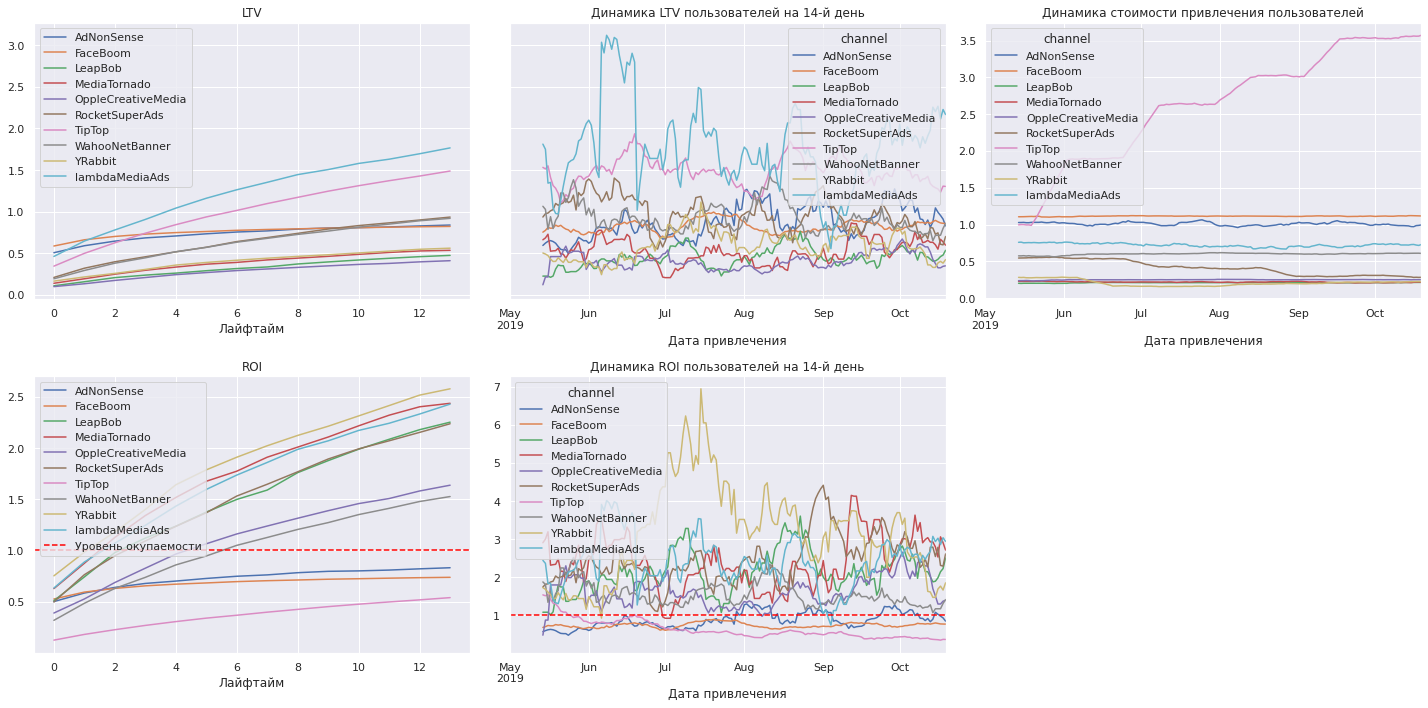

In [33]:
# Используем функции get_ltv() и plot_ltv_roi().
# Задаем разбивку по рекламному каналу.
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На основании построенных графиков можем сделать выбор о том, что: 

 - Затраты на рекламу с использованием каналов  TipTop, FaceBoom и AdNonSense не окупаются.


 - Стоимость привлечения пользователей с использованием TipTop значительно увеличивается каждый месяц - пик (3.5), для других каналов динамика стабильна.


 - Рост LTV в динамике скачкообразный, на это может влиять сезонный фактор.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Получается, дорогие каналы не окупаются

</div>


### Графики конверсии и удержания по рекламным каналам

Построим и изучим графики конверсии и удержания с разбивкой по рекламным каналам, чтобы более детально разобраться с причинами проблем, описаных выше. Ими могут быть низкая конверсия или низкое удержание пользователей.

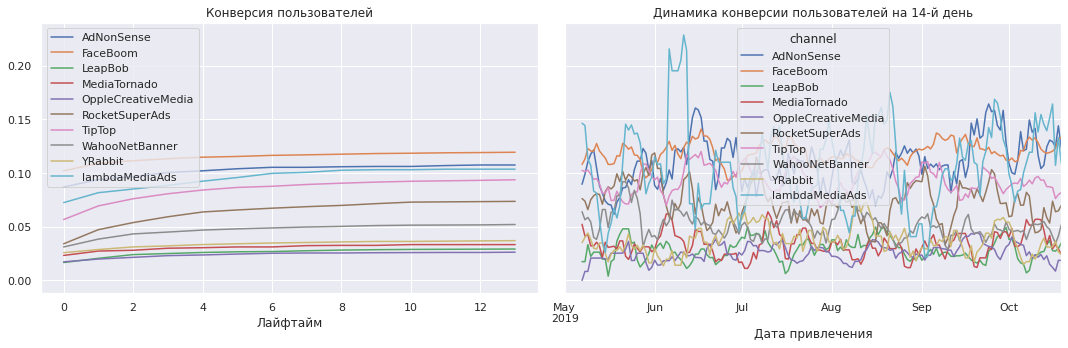

In [34]:
# Используем функции get_conversion() и plot_conversion().
# Задаем разбивку по каналу.
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Наибольшей конверсией пользователей среди все рекламных каналов обладает FaceBoom. В целом, конверся на протяжении всего лайвтайма практически неизменна для всех пользователей.

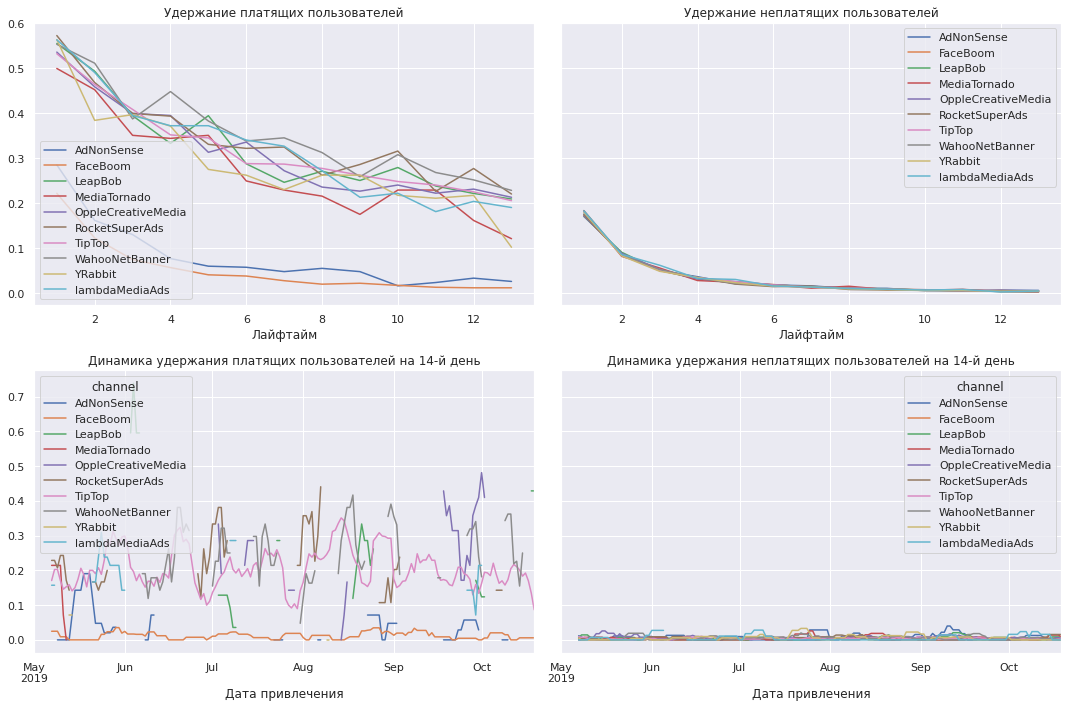

In [35]:
# Используем функции get_retention() и plot_retention().
# Задаем разбивку по каналу.
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

У каналов FaceBoom и AdNonSense отмечается наименьший уровень удержания пользователй.

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Да, по полученным графикам видно, что каналы FaceBoom и AdNonSense являются лидерами по конверсии, но аутсайдерами по удержанию.

</div>


**Промежуточные выводы по шагу №5**

 - Окупаемость в целом.

Реклама, направленная на привлечение пользователей в целом не окупается, не смотря на нормальный уровень конверсии. 
Причинами данной ситуации являются два связанных фактора: падение окупаемости и рост стоимости привлечения. 
 
Так значение ROI в конце второй недели — чуть выше 80%. Динамика падает и привлеченные клиенты перестают окупаться в двухнедельном лайфтайме.

Рост LTV в динамике скачкообразный, на это может влиять сезонный фактор.
 
 - Конверсия и удержание.
  
Отмечается нормальный рост конверсии пользователей.
 
Отмечается более высокий уровень удержания у платящих пользователей. На 14 день для платящих пользователей наблюдается достаточно большой расброс удержания в динамике, в отличии неплатящих пользователей.
 
  - Окупаемость в зависимости от страны

Наибольшее влияние на снижение окупаемости оказывает United States, которые является основным источником новых пользователей. 
 
 Стоимость привлечения пользователя по месяцам имеет постоянный рост для United States, в остальном с июня для других стран она практически неизменна.
 
   - Окупаемость, конверсия и удержание в зависимости рекламного канала
 
Не смотря на постоянное увеличение расходов на привлечения пользователей с использованием каналов TipTop и FaceBoom, они не окупаются.Большая часть затрат приходится на TipTop - 51.9% общего бюджета и FaceBoom - 30.8% общего бюджета.

Наибольшей конверсией пользователей среди все рекламных каналов обладает FaceBoom. В целом, конверся на протяжении всего лайвтайма практически неизменна для всех пользователей.

У каналов FaceBoom и AdNonSense отмечается наименьший уровень удержания пользователй.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**


   Дополню твои выводы. TipTop - очень дорогой канал, тянущий деньги. FaceBoom приводит платящих пользователей с низким качеством, они быстро уходят. В этом можно и нужно убедиться, построив графики конверсии и удержания по всем каналам



</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В данном пункте построил графики конверсии и удержания по всем каналам, в итоговом выводе отразил проблематику и дополнил рекомендации.
</div>

## Шаг 6. Выводы

**На основании проведенного анализа были выявлены следующие закономерности и сформулированы рекомендации, позволяющие спланировать успешные рекламные кампании по привлечению пользователей.**

 - Причины неэффективности привлечения пользователей и рекомендации
 
В результате исследования было выявлено, что, реклама направленная на привлечение пользователей в целом не окупается. Причинами данной ситуации являются два связанных фактора: падение окупаемости и рост стоимости привлечения.

**1) Наблюдается неправильная маркетинговая политика в отношении регионов, слишком большой расчет на привлечение пользвателей из United States как основного источника трафика (100002) и, как следствие, большие затраты на рекламу и низкая окупаемость.**
   
Необходимо учитывать специфику проведения рекламных компаний во всех регионах. Стоит обратить внимание на европейский рынок для поддержания общего уровня окупаемости на более стабильном уровне.
 
**2) Слабая окупаемость каналов из United States - TipTop и FaceBoom и плохая оптимизация под разные каналы.**

С учетом того, что подавляющее количество пользователей из United States, необходимо проработать отношения с рекламными площадками, которые относятся непосредственно к этой стране, не вливая деньги в другие.

Перспективным аналогом в United States является RocketSuperAds. Не смотря на то, что канал имеет незначительное количество привлеченных пользователей (4448), стоимость привлечения клиента ниже чем у TipTop и FaceBoom, также имеет неплохое удержание и конверсию.

Отдельно стоит отметить проблемную ситуацию с каналом FaceBoom, который, имея второе место по сумме затрат на рекламу, не окупается и имеет наименьшее значение удержания пользователей, что делает его крайне невыгодным каналом для вложений рекламных средств.

Необходимо выяснить причину низкого удержания пользователей, привлекаемых FaceBoom, на стороне рекламного кнала. На основании этого принемать дальнейшие решения.

Как вариант, стоит рассмтреть возможность, сократить бюджет на рекламу в каналах TipTop и FaceBoom и перенаправить рекламные средства в пользу других каналов. Также, необходимо равномерно распределять рекламные интеграции под разные источники трафика с приемлимым уровнем конверсии и удержания пользователей и регулярно обновлять сами рекламные интеграции исходя из специфики платформы.

**3) Болшая часть привлекаемых пользователей чаще всего используют IPhone и Mac, но окупаемость у них наименьшая, отчасти это може быть связано с тем, что наибольшее расспространение данные устройтва имеют в United States.**

Необходимо проанализировать альтернативные платформы, Android и PC (единственная платформа которая окупается за рассматриваемый лайвтайм) и оптимизировать рекламный бюджет под данные устройства.
 
 

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Постарался подробнее раскрыть рекомендации касательно TipTop и FaceBoom. Надеюсь теперь все нормально.
</div>

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**

  Так как основная проблема таится в каналах TipTop и FaceBoom - это рынок США, то попробуй сформулировать дополнительные рекомендации, которые относятся непосредственно к этой стране, не вливая деньги в другие.
И посмотри на показатели FaceBoom - в целом, канал неплох, может быть, с ним что-то можно сделать?

</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**

Верно, мы можем повысить удержание для пользователей из США, например с помощью введения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Для канала FaceBoom можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками. Также, можно ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале.

</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   Матвей, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>